In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

In [2]:
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()

In [3]:
style.use('fivethirtyeight')

In [4]:
df = pd.read_csv(r'C:\Users\omar mohamed\Downloads\task\diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.duplicated().sum()

0

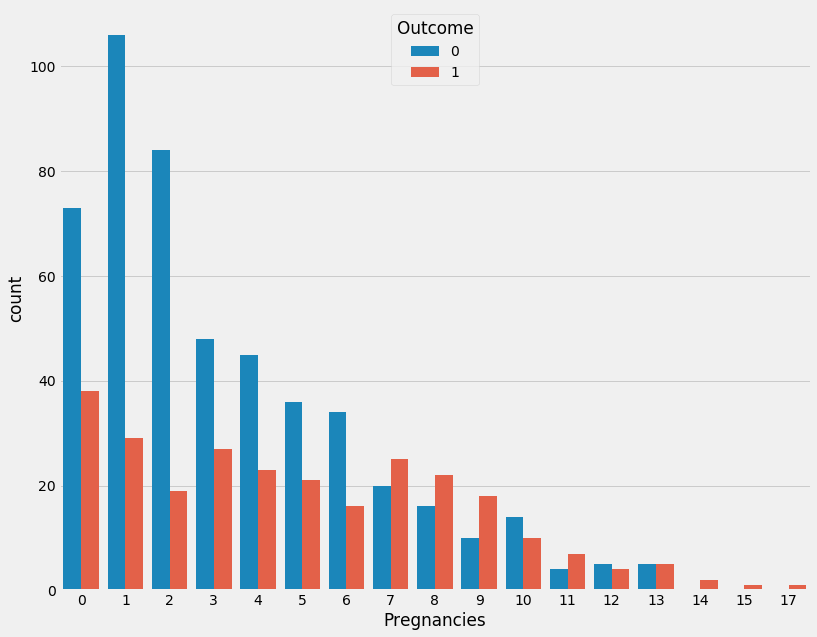

In [11]:
plt.figure(figsize=(12,10))
sns.countplot(df.Pregnancies,hue=df['Outcome'])

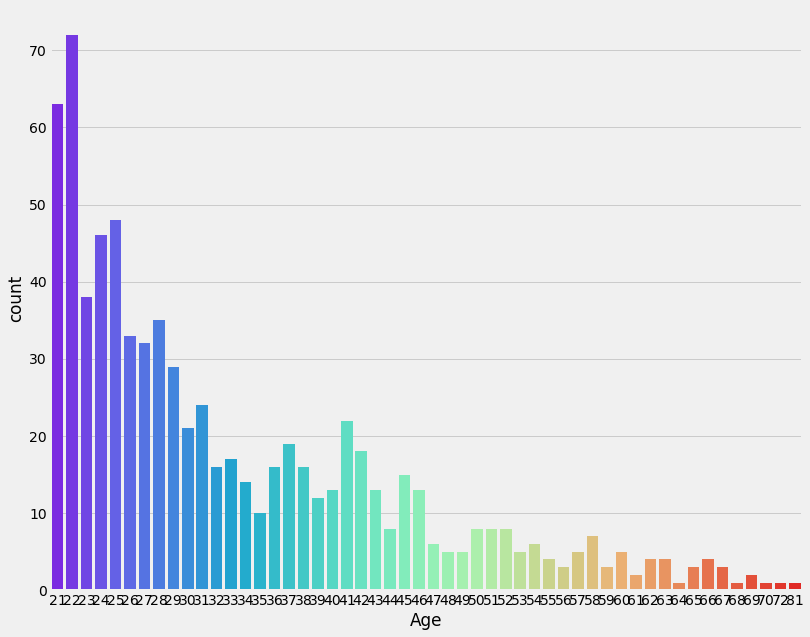

In [12]:
plt.figure(figsize=(12,10))
sns.countplot(df.Age,palette='rainbow')

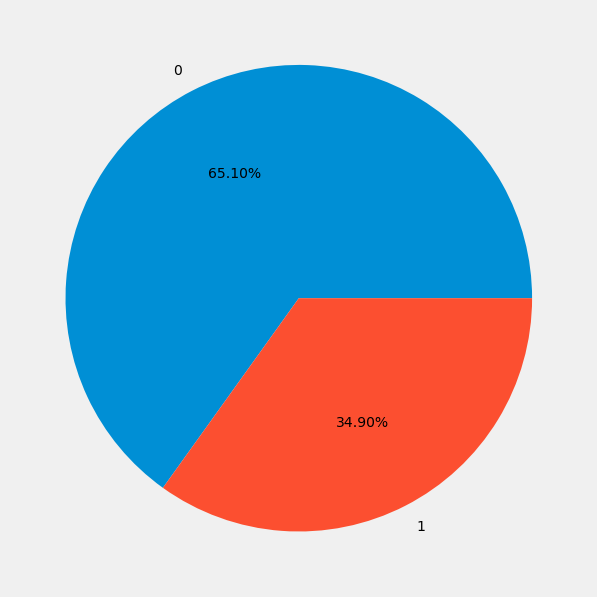

In [13]:
plt.figure(figsize=(10,10))
plt.pie(df.Outcome.value_counts(),autopct='%0.2f%%',labels=[0,1])
plt.show()

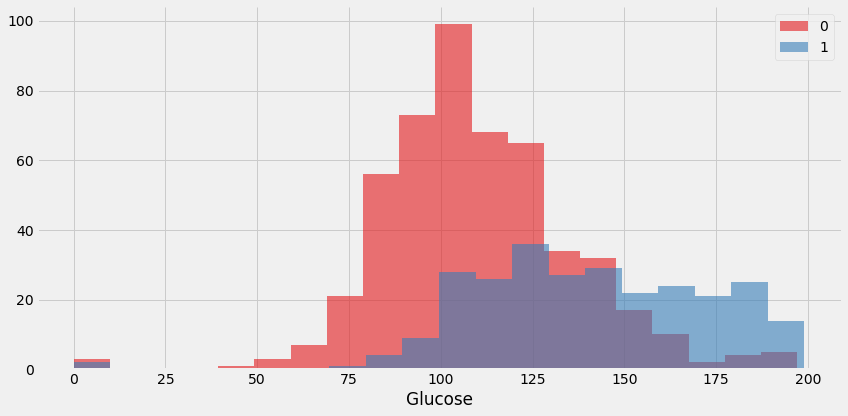

In [14]:
g = sns.FacetGrid(df,hue='Outcome',palette='Set1',height=6,aspect=2)
g.map(plt.hist,'Glucose',alpha=0.6,bins=20)
plt.legend()

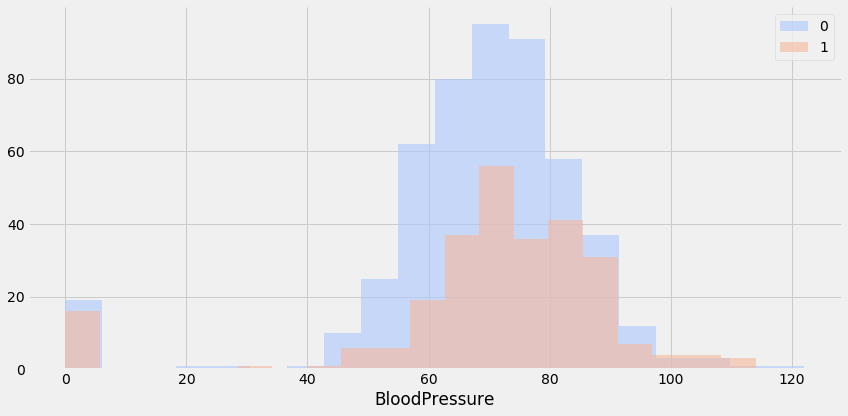

In [15]:
g = sns.FacetGrid(df,hue='Outcome',palette='coolwarm',height=6,aspect=2)
g.map(plt.hist,'BloodPressure',alpha=0.6,bins=20)
plt.legend()

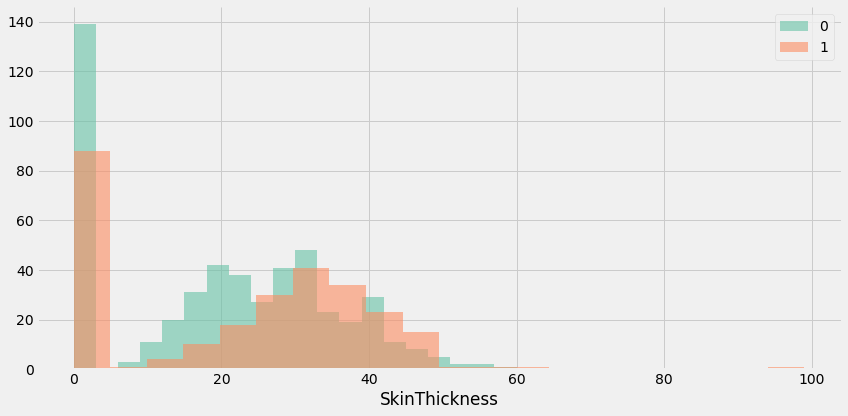

In [16]:
g = sns.FacetGrid(df,hue='Outcome',palette='Set2',height=6,aspect=2)
g.map(plt.hist,'SkinThickness',alpha=0.6,bins=20)
plt.legend()

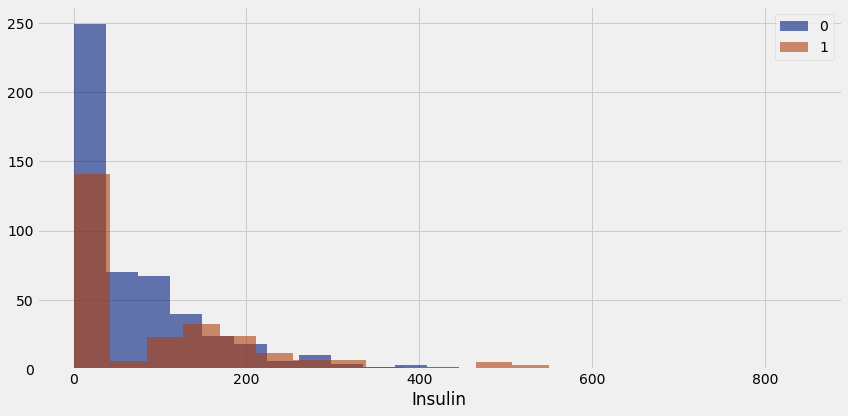

In [17]:
g = sns.FacetGrid(df,hue='Outcome',palette='dark',height=6,aspect=2)
g.map(plt.hist,'Insulin',alpha=0.6,bins=20)
plt.legend()

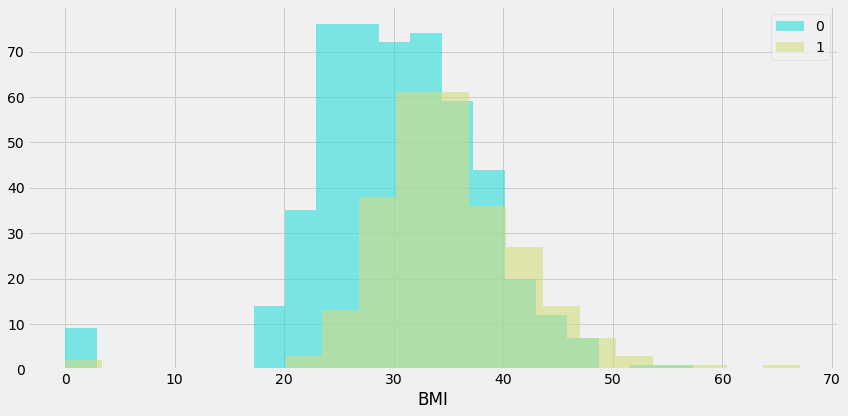

In [18]:
g = sns.FacetGrid(df,hue='Outcome',palette='rainbow',height=6,aspect=2)
g.map(plt.hist,'BMI',alpha=0.6,bins=20)
plt.legend()

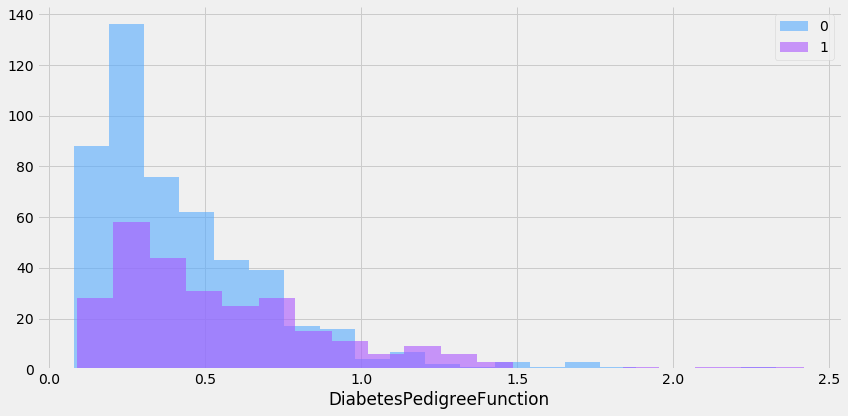

In [19]:
g = sns.FacetGrid(df,hue='Outcome',palette='cool',height=6,aspect=2)
g.map(plt.hist,'DiabetesPedigreeFunction',alpha=0.6,bins=20)
plt.legend()

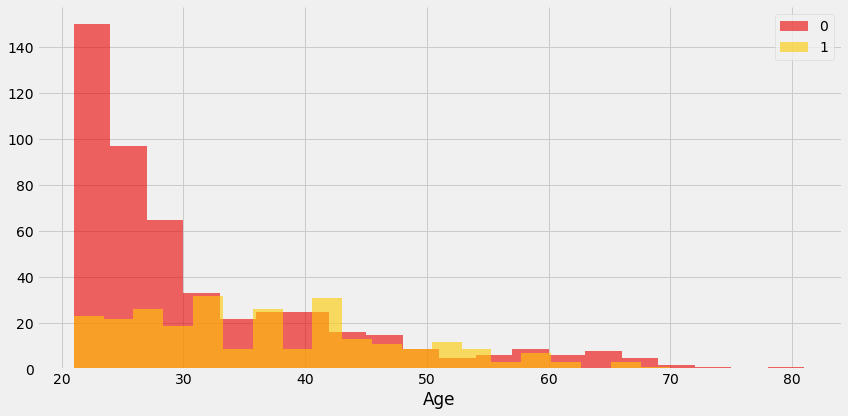

In [20]:
g = sns.FacetGrid(df,hue='Outcome',palette='hot',height=6,aspect=2)
g.map(plt.hist,'Age',alpha=0.6,bins=20)
plt.legend()

In [21]:
df1 = df[df['Outcome'] == 1]
df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NAN)

df0 = df[df['Outcome'] == 0]
df0[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df0[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NAN)

In [22]:
df1.fillna(np.floor(df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].mean()),inplace=True)
df0.fillna(np.floor(df0[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].mean()),inplace=True)

In [23]:
df = pd.concat([df0,df1])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.0,130.0,26.6,0.351,31,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,27.0,130.0,25.6,0.201,30,0
7,10,115.0,70.0,27.0,130.0,35.3,0.134,29,0
10,4,110.0,92.0,27.0,130.0,37.6,0.191,30,0


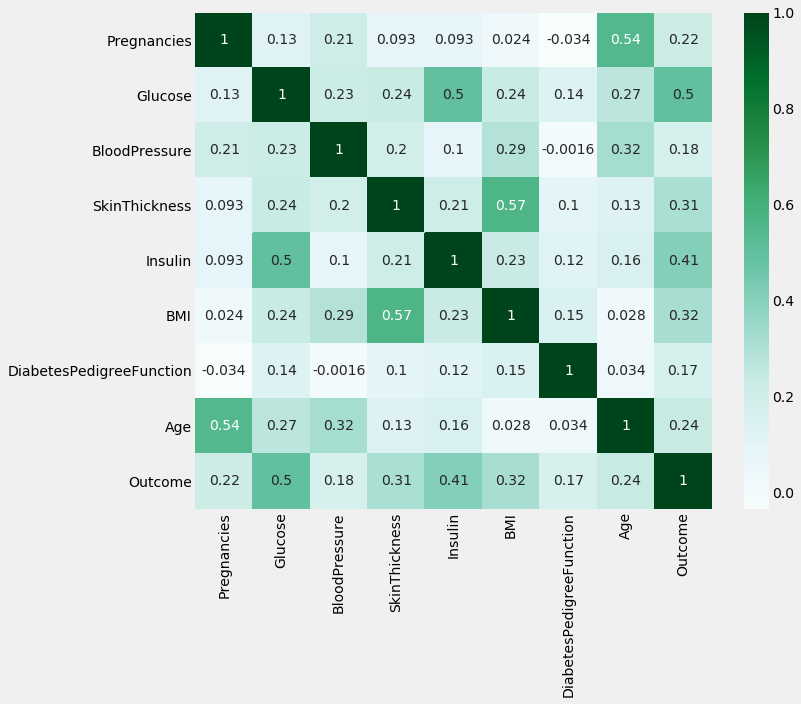

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='BuGn')
plt.tight_layout()

C:\Users\omar mohamed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\omar mohamed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



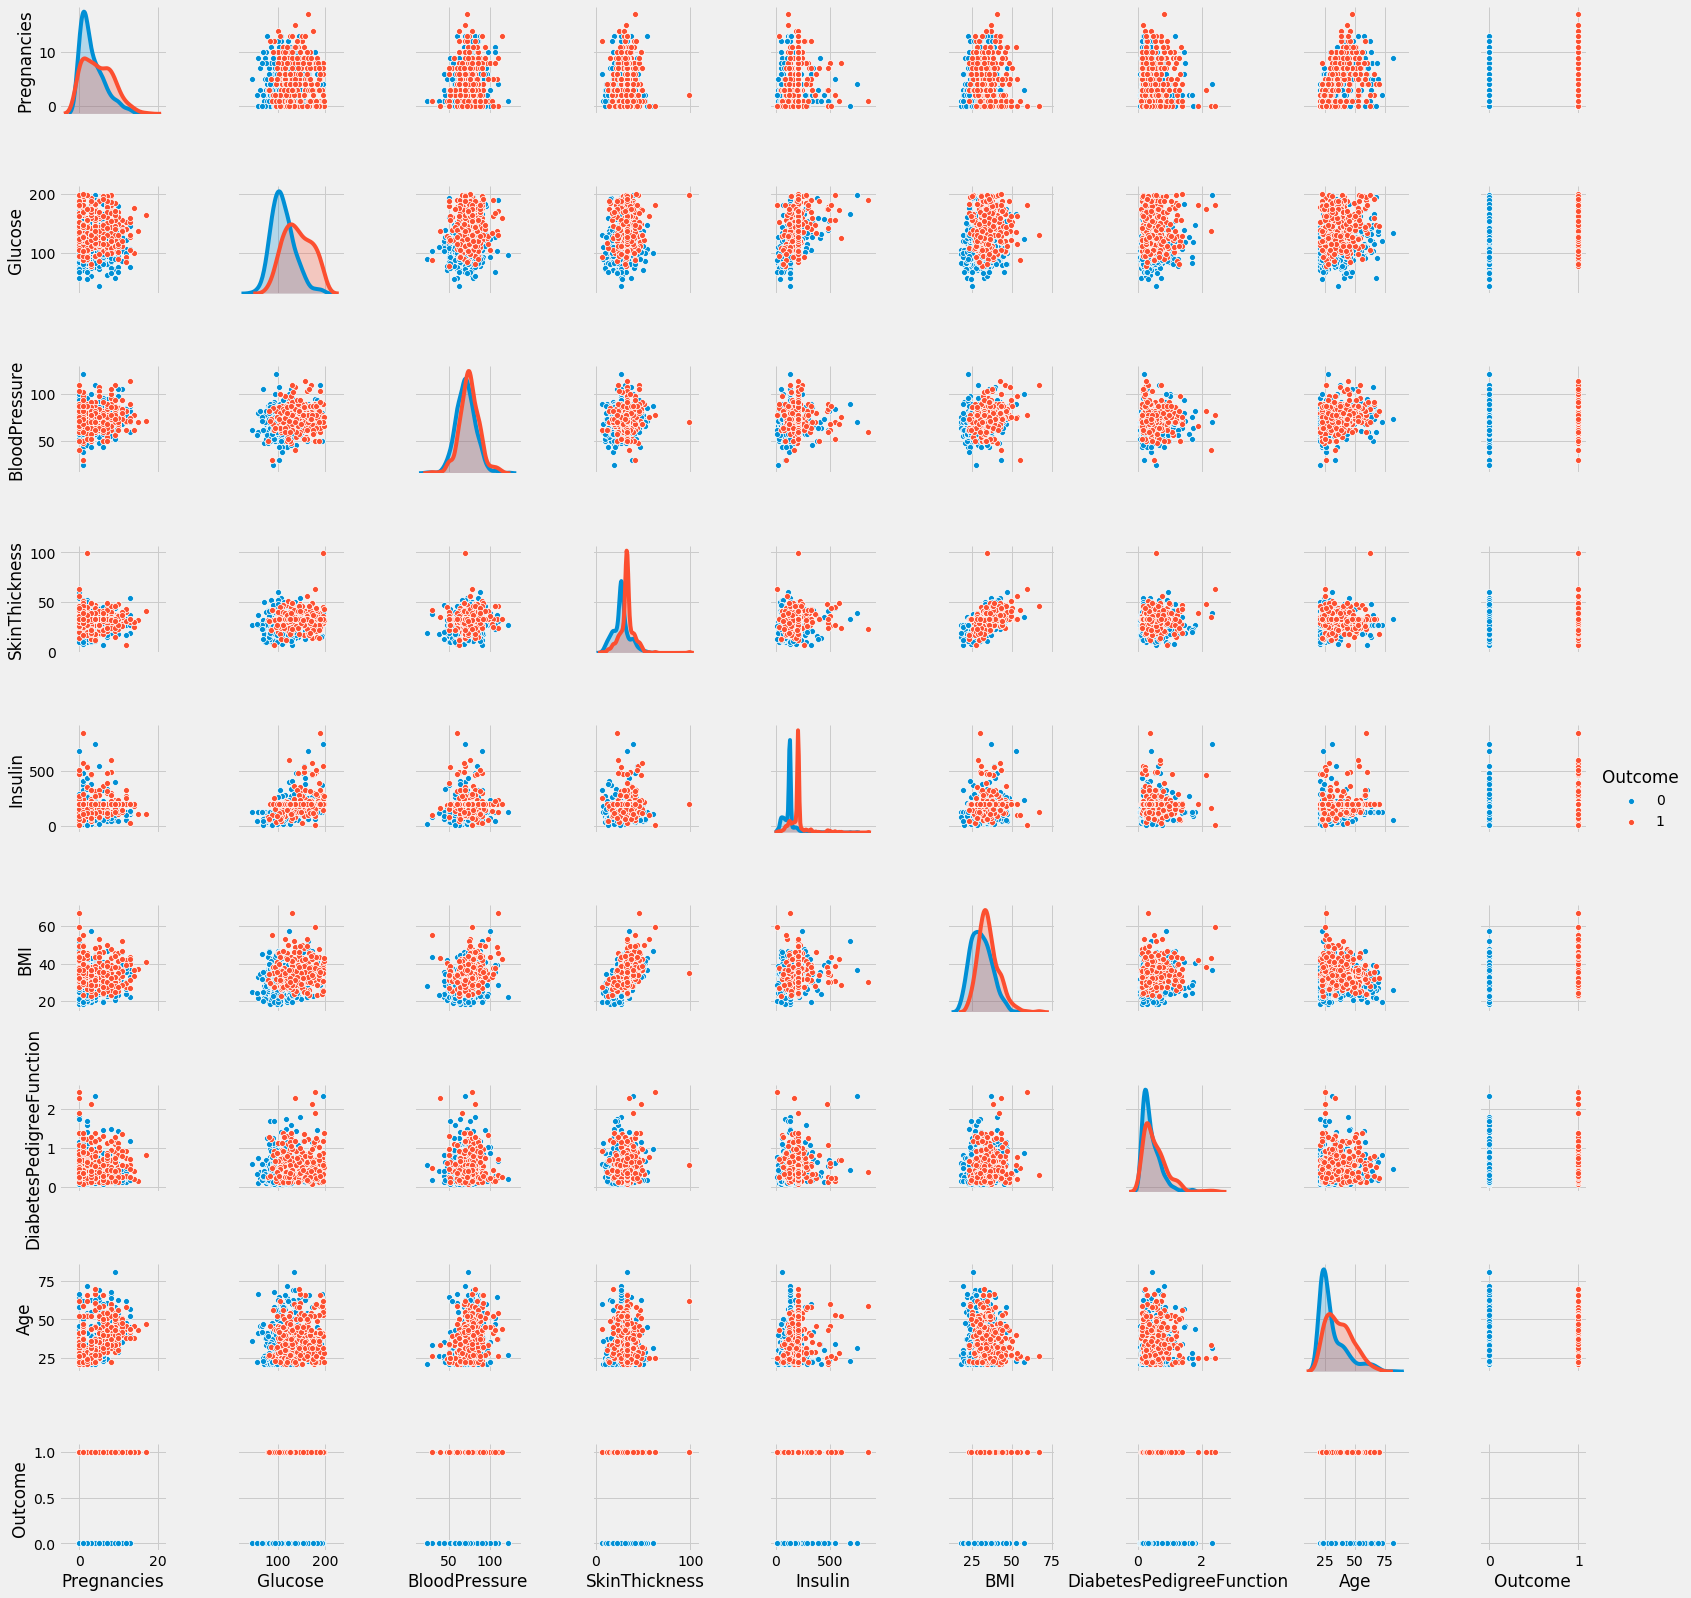

In [25]:
sns.pairplot(df,hue='Outcome')

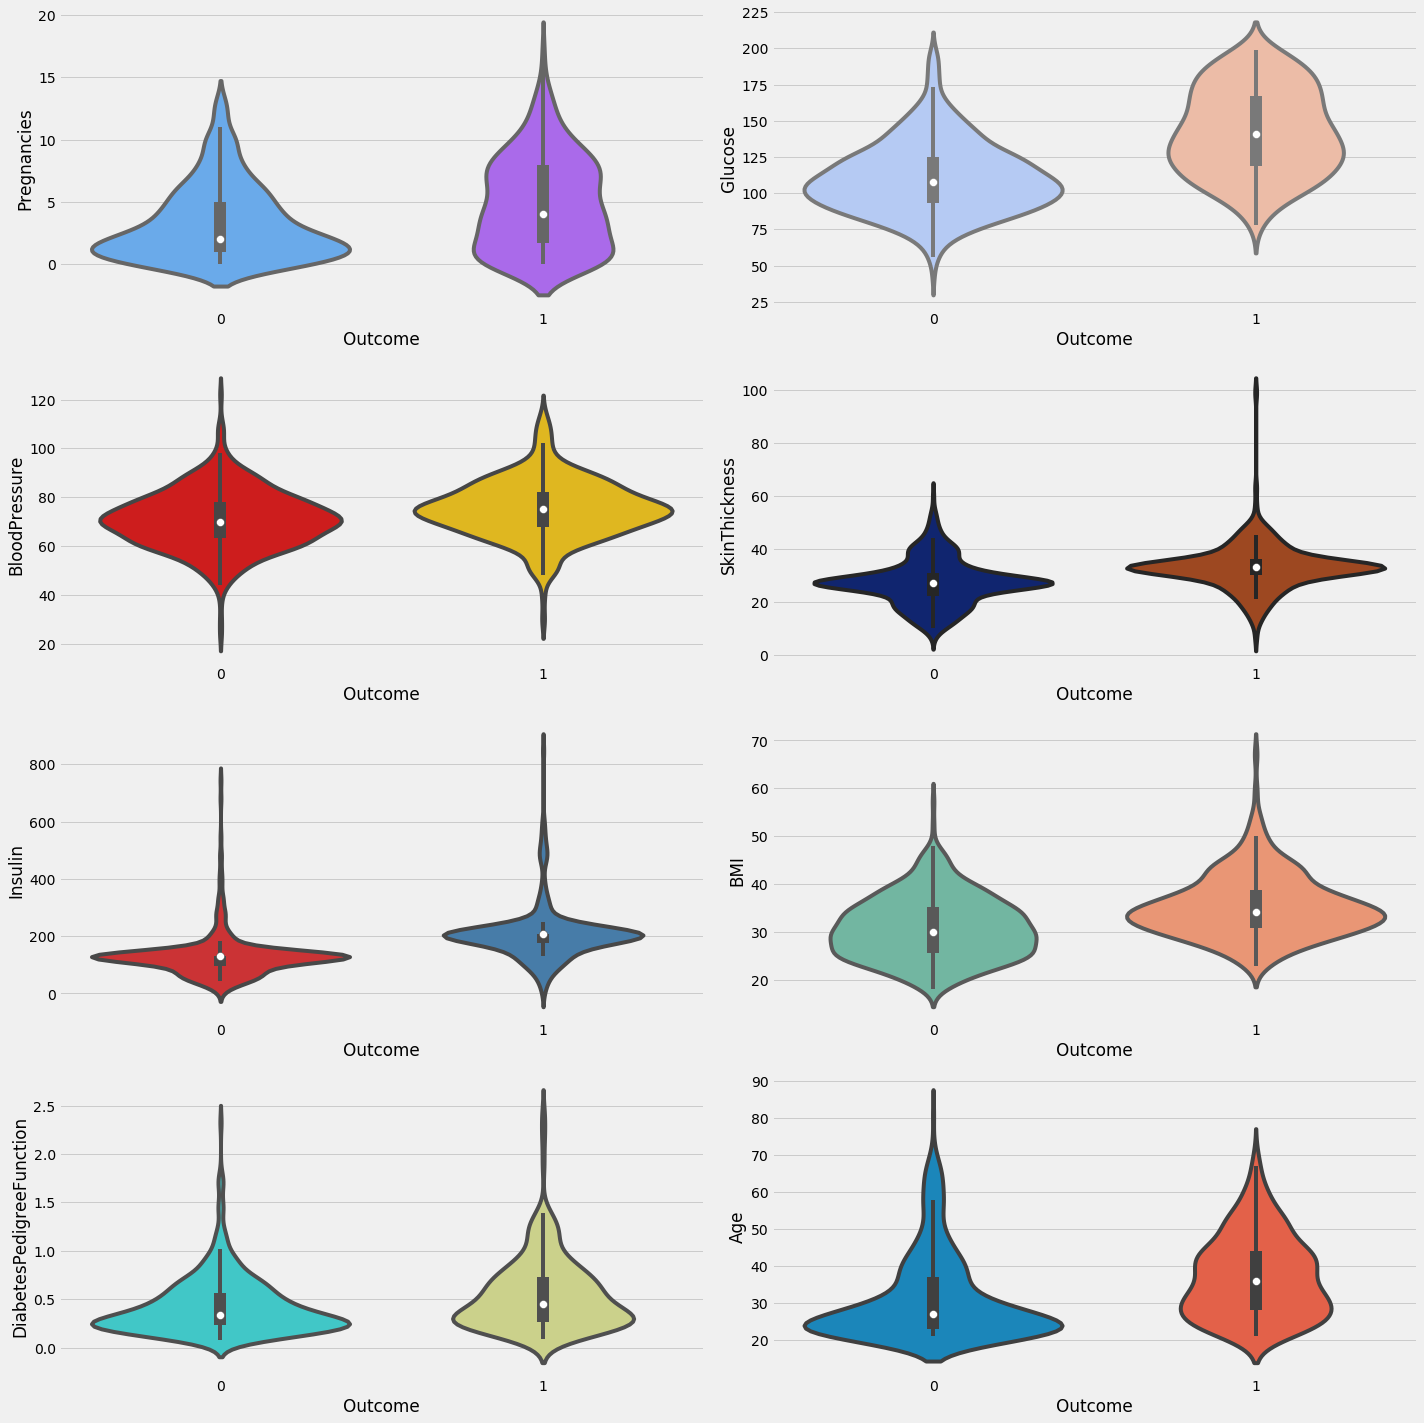

In [26]:
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
sns.violinplot(x=df['Outcome'],y=df['Pregnancies'],palette='cool')

ax2 = plt.subplot(4,2,2)
sns.violinplot(x=df['Outcome'],y=df['Glucose'],palette='coolwarm')

ax3 = plt.subplot(4,2,3)
sns.violinplot(x=df['Outcome'],y=df['BloodPressure'],palette='hot')

ax4 = plt.subplot(4,2,4)
sns.violinplot(x=df['Outcome'],y=df['SkinThickness'],palette='dark')

ax5 = plt.subplot(4,2,5)
sns.violinplot(x=df['Outcome'],y=df['Insulin'],palette='Set1')

ax6 = plt.subplot(4,2,6)
sns.violinplot(x=df['Outcome'],y=df['BMI'],palette='Set2')

ax7 = plt.subplot(4,2,7)
sns.violinplot(x=df['Outcome'],y=df['DiabetesPedigreeFunction'],palette='rainbow')

ax8 = plt.subplot(4,2,8)
sns.violinplot(x=df['Outcome'],y=df['Age'])

plt.tight_layout()
plt.show()

In [27]:
df_group = df.groupby('Outcome',as_index=False)
df_group_mean = np.round(df_group.mean())
df_group_mean

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,3.0,111.0,71.0,27.0,130.0,31.0,0.0,31.0
1,1,5.0,142.0,75.0,33.0,206.0,35.0,1.0,37.0


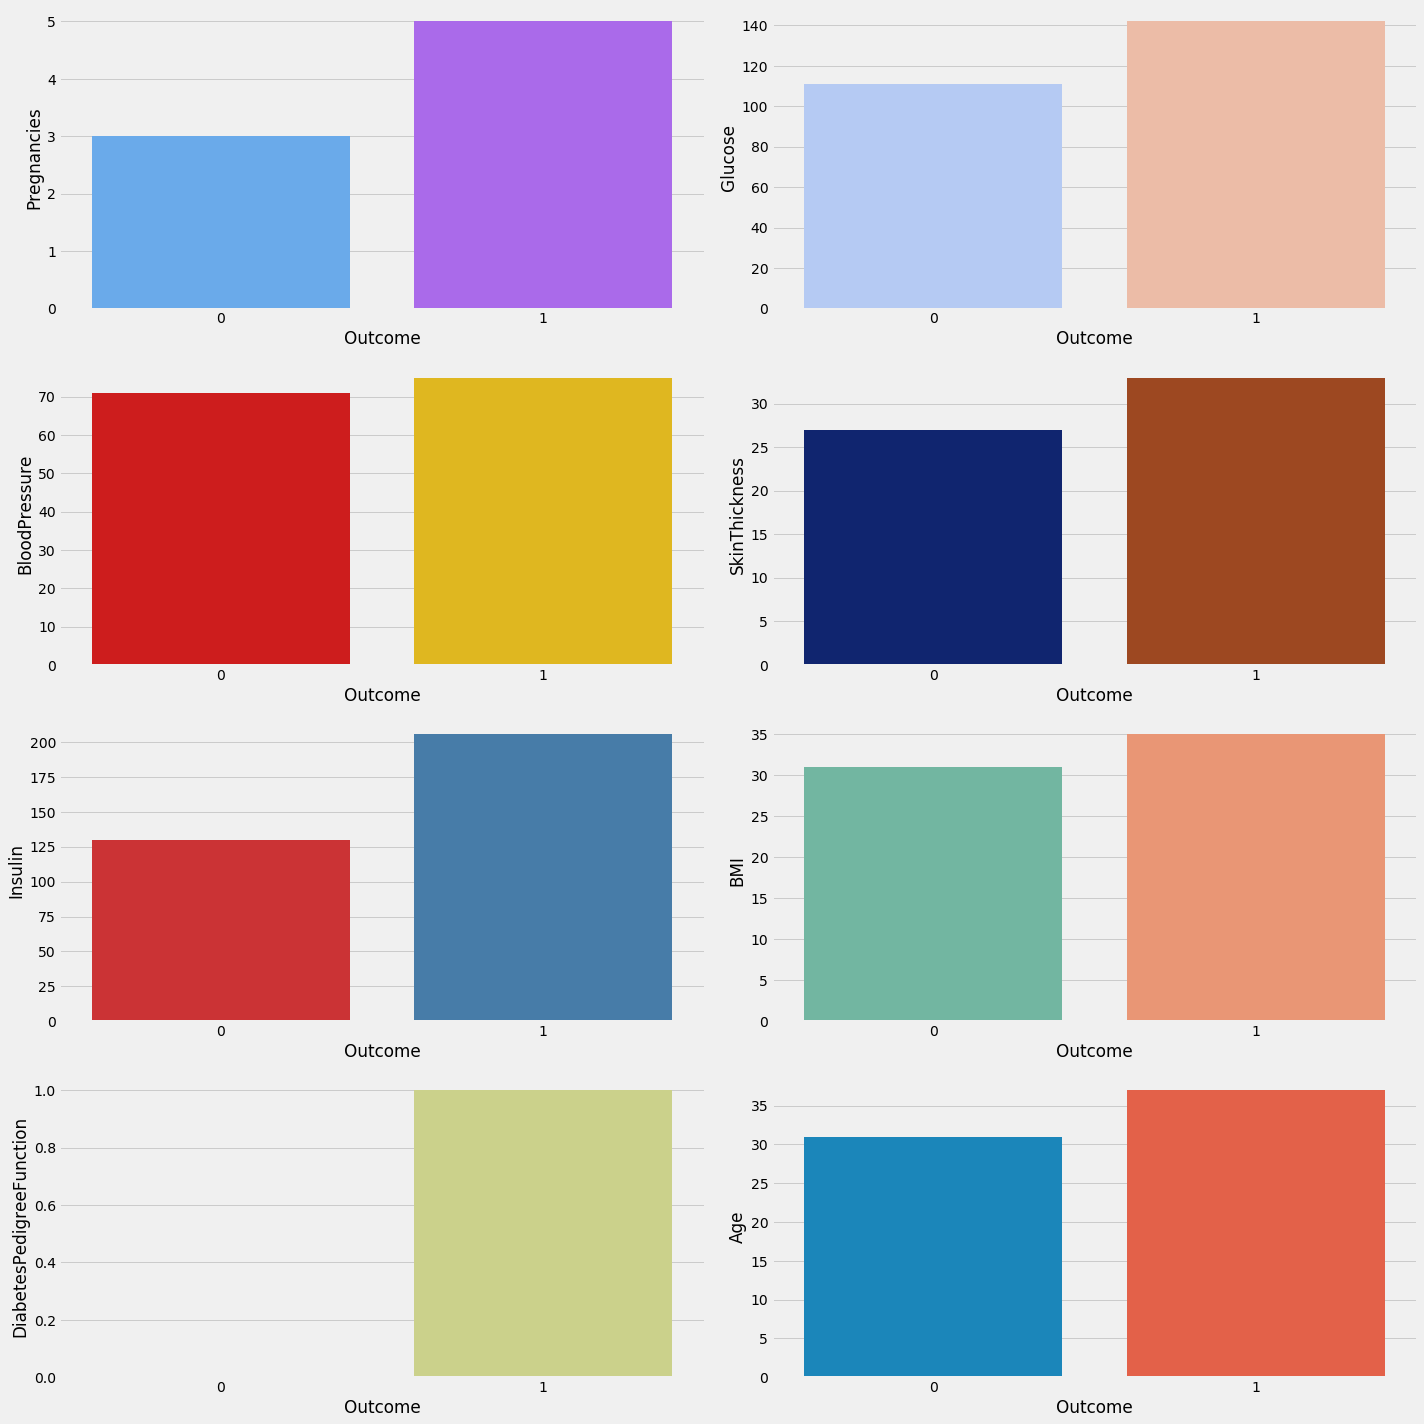

In [28]:
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
sns.barplot(x=df_group_mean['Outcome'],y=df_group_mean['Pregnancies'],palette='cool')

ax2 = plt.subplot(4,2,2)
sns.barplot(x=df_group_mean['Outcome'],y=df_group_mean['Glucose'],palette='coolwarm')

ax3 = plt.subplot(4,2,3)
sns.barplot(x=df_group_mean['Outcome'],y=df_group_mean['BloodPressure'],palette='hot')

ax4 = plt.subplot(4,2,4)
sns.barplot(x=df_group_mean['Outcome'],y=df_group_mean['SkinThickness'],palette='dark')

ax5 = plt.subplot(4,2,5)
sns.barplot(x=df_group_mean['Outcome'],y=df_group_mean['Insulin'],palette='Set1')

ax6 = plt.subplot(4,2,6)
sns.barplot(x=df_group_mean['Outcome'],y=df_group_mean['BMI'],palette='Set2')

ax7 = plt.subplot(4,2,7)
sns.barplot(x=df_group_mean['Outcome'],y=df_group_mean['DiabetesPedigreeFunction'],palette='rainbow')

ax8 = plt.subplot(4,2,8)
sns.barplot(x=df_group_mean['Outcome'],y=df_group_mean['Age'])

plt.tight_layout()
plt.show()

In [29]:
#from sklearn.preprocessing import StandardScaler
#scalar = StandardScaler()
#scalar.fit(df.drop('Outcome',axis=1))
#scaled_feat = scalar.transform(df.drop('Outcome',axis=1))
#scaled_feat = pd.DataFrame(scaled_feat,columns=df.columns[0:-1])

In [30]:
#scaled_feat.head()

In [31]:
#X = scaled_feat
X  = df.drop('Outcome',axis=1)
y = df['Outcome']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [37]:
pred = knn.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report

In [39]:
error_rate = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict = knn.predict(X_test)
    error_rate.append(np.mean(predict != y_test))

In [40]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[140  16]
 [ 18  57]]


              precision    recall  f1-score   support

           0       0.89      0.90      0.89       156
           1       0.78      0.76      0.77        75

    accuracy                           0.85       231
   macro avg       0.83      0.83      0.83       231
weighted avg       0.85      0.85      0.85       231



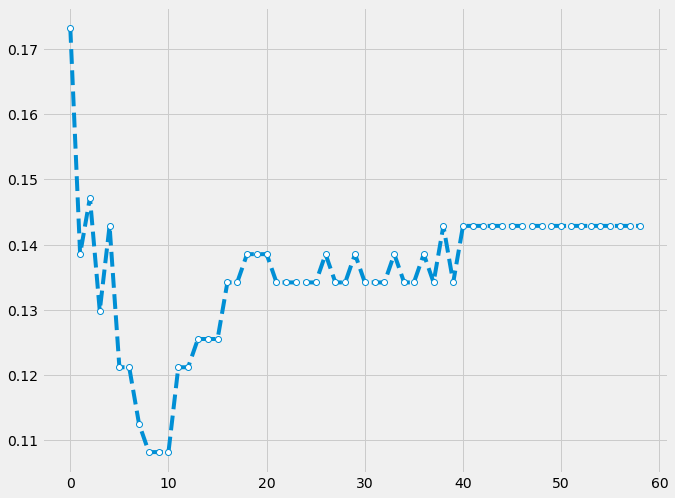

In [41]:
plt.figure(figsize=(10,8))
plt.plot(range(len(error_rate)),error_rate,marker='o',markerfacecolor='white',linestyle='--')

In [42]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
print("Accuracy {}".format(accuracy_score(y_test, knn_predict)))

Accuracy 0.8874458874458875


In [44]:
print(confusion_matrix(y_test,predict))
print('\n')
print(classification_report(y_test,knn_predict))

[[141  15]
 [ 18  57]]


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       156
           1       0.90      0.73      0.81        75

    accuracy                           0.89       231
   macro avg       0.89      0.85      0.86       231
weighted avg       0.89      0.89      0.88       231



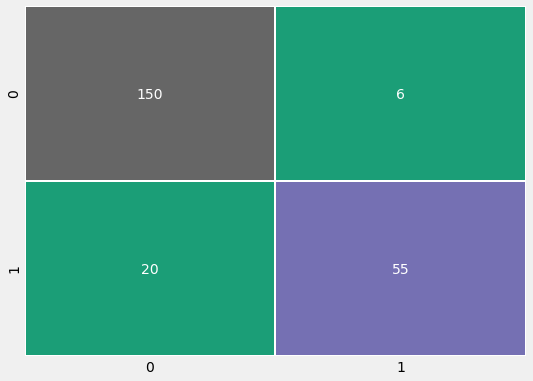

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,knn_predict)),annot=True,cmap='Dark2',cbar=False,linewidths=1,fmt='.3g')

In [46]:
from sklearn.svm import SVC

In [47]:
svc = SVC(gamma=0.0001,C=1)

In [48]:
svc.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
svc_predict = svc.predict(X_test)

In [50]:
print("Accuracy {}".format(accuracy_score(y_test, svc_predict)))

Accuracy 0.8744588744588745


In [51]:
print(confusion_matrix(y_test,svc_predict))
print('\n')
print(classification_report(y_test,svc_predict))

[[144  12]
 [ 17  58]]


              precision    recall  f1-score   support

           0       0.89      0.92      0.91       156
           1       0.83      0.77      0.80        75

    accuracy                           0.87       231
   macro avg       0.86      0.85      0.85       231
weighted avg       0.87      0.87      0.87       231



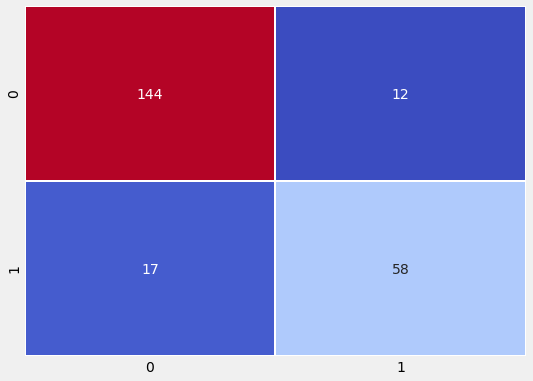

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,svc_predict)),annot=True,cmap='coolwarm',cbar=False,linewidths=1,fmt='.3g')